In [10]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.model_selection import cross_validate
from sklearn.externals import joblib
from sklearn.base import clone
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
gb_model = pickle.load(open('gradient_boost_score_first_half.p', 'rb')) # load the model

In [5]:
gb_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=100,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.3, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)>

In [6]:
def only_completed(X_train, y_train, X_test, y_test, y_train_not_comp, y_test_not_comp):
    '''
    Returns dataframes with only those students who completed the course for the purpose of regressing the final score.
    '''
    test_indices = []
    train_indices = []

    y_test_not_comp = y_test_not_comp[y_test_not_comp['module_not_completed'] == 1]
    for index, row in y_test_not_comp.iterrows():
        test_indices.append(index)

    y_train_not_comp = y_train_not_comp[y_train_not_comp['module_not_completed'] == 1]
    for index, row in y_train_not_comp.iterrows():
        train_indices.append(index)

    return X_train.drop(train_indices), y_train.drop(train_indices), X_test.drop(test_indices), y_test.drop(test_indices)

In [7]:
    X_train = pd.read_csv('../data/processed/first_half/X_train.csv')
    y_train = pd.read_csv('../data/processed/first_half/y_train.csv')
    y_train_not_comp = y_train[['module_not_completed']]
    y_train = y_train['estimated_final_score']
    X_test = pd.read_csv('../data/processed/first_half/X_test.csv')
    y_test = pd.read_csv('../data/processed/first_half/y_test.csv')
    y_test_not_comp = y_test[['module_not_completed']]
    y_test = y_test['estimated_final_score']

    # fill
    X_train.fillna(value = 0, inplace = True)
    y_train.fillna(value = 0, inplace = True)
    X_test.fillna(value = 0, inplace = True)
    y_test.fillna(value = 0, inplace = True)

    # only students who completed the course
    X_train, y_train, X_test, y_test = only_completed(X_train, y_train, X_test, y_test, y_train_not_comp, y_test_not_comp)

In [8]:
    predictions = gb_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    evs = explained_variance_score(y_test, predictions)
    r2 = r2_score(y_test, predictions)

In [9]:
    print('Root Mean Squared Error: {}'.format(rmse))
    print('Target Standard Deviation: {}'.format(np.std(y_test)))
    print('R-Squared: {}'.format(r2))
    print('Explained Variance Score: {}'.format(evs))

Root Mean Squared Error: 8.141242730811648
Target Standard Deviation: 26.404166201517572
R-Squared: 0.9049315329086646
Explained Variance Score: 0.9049324146755275


In [10]:
    feat_imp = importances(rf_model, X_test, y_test)
    feat_imp.sort_values(by='Importance', ascending=False)[0:20]

,Importance
Feature,
code_module_GGG,1.172563
avg_score,0.270237
days_early_first_assessment,0.221181
avg_days_sub_early,0.030058
score_first_assessment,0.024265
sum_click_oucontent,0.016715
sum_click_quiz,0.001892
sum_days_vle_accessed,0.001348
sum_click_forumng,0.001122


In [11]:
features=list(range(len(X_train.columns)))

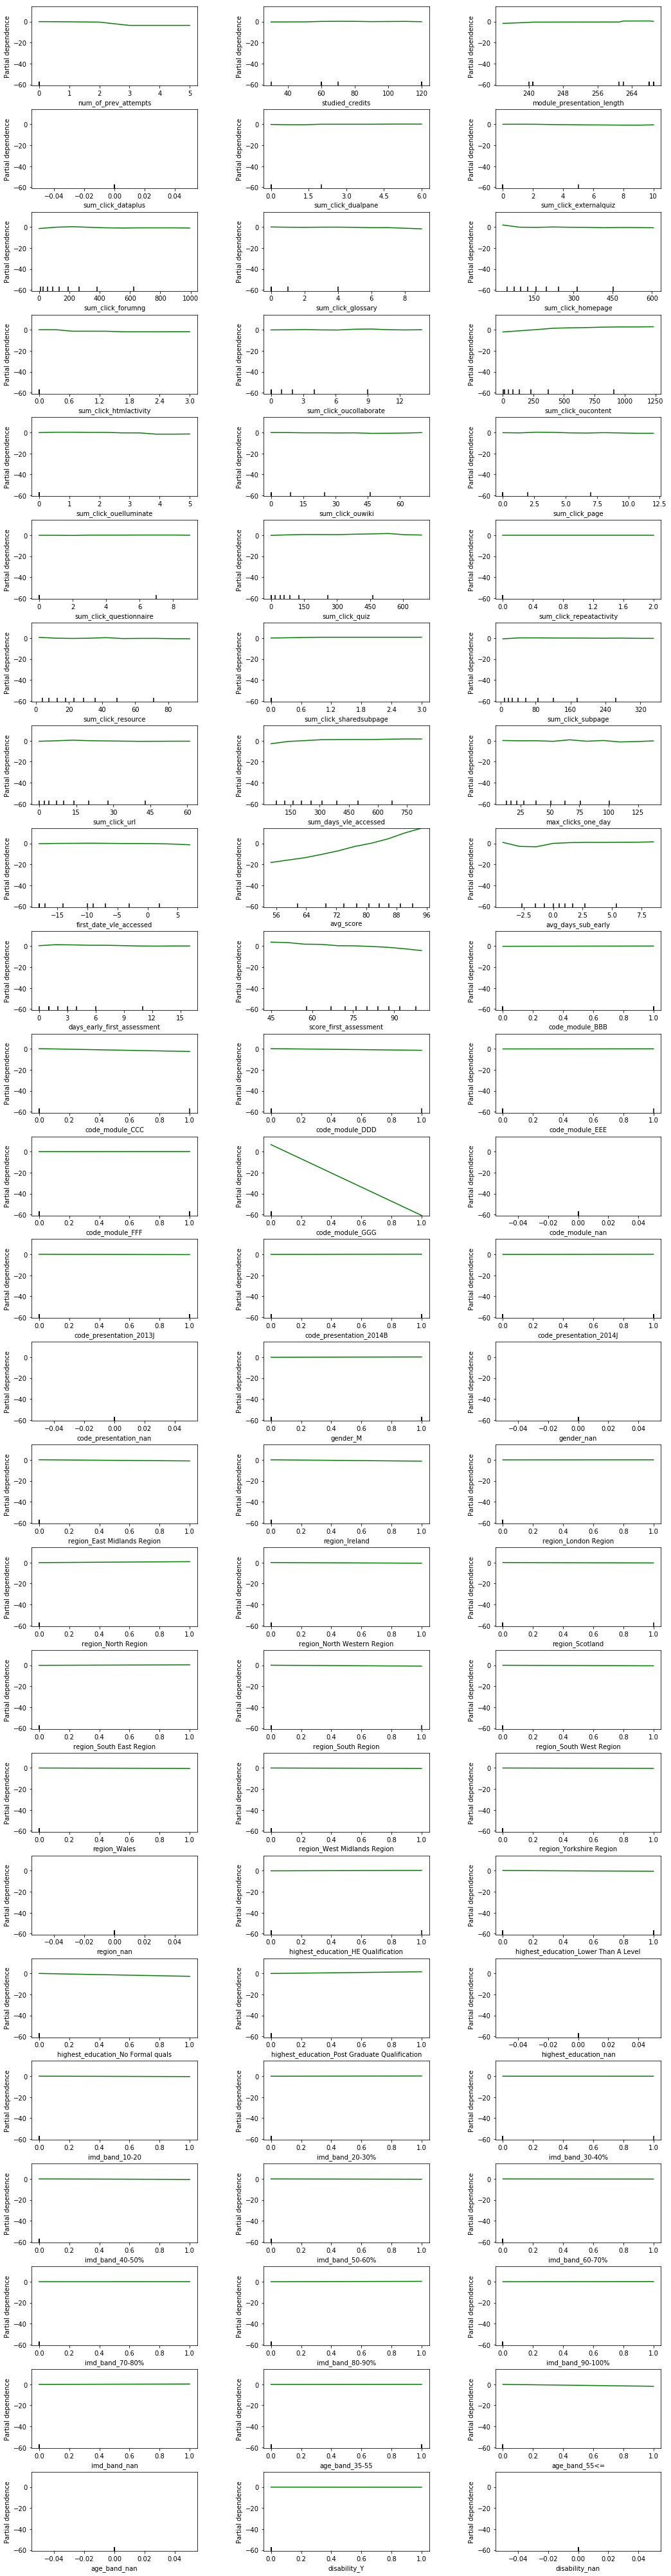

In [12]:
feat = []
for n in range(75):
    feat.append(n)
fig, ax = plot_partial_dependence(gb_model, X=X_train, features=feat, feature_names=X_train.columns[feat], grid_resolution=10)
fig.set_figwidth(16)
fig.set_figheight(100)